# Fraud Model Evaluation

**by Remington Greider-Little, Apr 2022**<br/>
**Data Analytics @ Newman University**

## About this Data Set
**This data is from [the Credit Card Fraud Detection data set from Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).**<br/>

**This Notebook:** In this notebook I evaluate different models abilitiy to correctly identify credit card fraud. Using confusion matrices I evaluate the accuracy, precision, and recall.


# Import Libraries & Set Default Plot Attributes

In [1]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

# Libraries for Machine Learning Process
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Customize seaborn plot styles
# Seaborn docs: https://seaborn.pydata.org/tutorial/aesthetics.html

# Adjust to retina quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Adjust dpi and font size
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)

# Display tick marks
sns.set_style('ticks')

# Remove borders
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

In [3]:
# Color palettes for plots
# Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# Seaborn color palette docs: https://seaborn.pydata.org/tutorial/color_palettes.html
# Seaborn palette chart: https://www.codecademy.com/article/seaborn-design-ii

# cp1 Color Palette - a binary blue/orange palette
blue = 'deepskyblue' # Use 'skyblue' for a lighter blue
orange = 'orange'
cp1 = [blue, orange]

# cp2 Palette - Reversed binary color order when needed for certain plots
cp2 = [orange, blue]

# cp5 Palette - 5 colors for use with categorical data
turqoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'darkgray'
cp5 = [blue, turqoise, salmon, tan, gray]

# cpd Palette - blue-to-orange diverging palette for correlation heatmaps
cpd = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp1)

# Read and Review the Data

In [4]:
# Read the data
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
# Dataframe fundamental info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Basic Modeling

## Prepare Data Splits

In [6]:
# features - all columns except target variable
features = df.drop('Class', axis=1)

# labels - only the target variable column
labels = df['Class']

In [7]:
# Create Train and Test Splits
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Report Number and Proportion of Train and Test Features and Labels
print(f'Train Split: {X_train.shape[0]} Records, {len(y_train)} Labels = {round(len(y_train)/len(labels), 4) * 100}%')
print(f'Test Split: {X_test.shape[0]} Records, {len(y_test)} Labels = {round(len(y_test)/len(labels), 4) * 100}%')

Train Split: 227845 Records, 227845 Labels = 80.0%
Test Split: 56962 Records, 56962 Labels = 20.0%


## Train Models

In [8]:
# Define the models list
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier()
         ]

# Train the models using the training features and labels
for model in models: 
    model.fit(X_train, y_train)
    # Report trained model
    print(f'Trained and ready: {model}')

/Users/remington/opt/anaconda3/envs/Newman_Analytics/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Trained and ready: LogisticRegression()
Trained and ready: DecisionTreeClassifier()
Trained and ready: RandomForestClassifier()
Trained and ready: GradientBoostingClassifier()


In [9]:
# Test all models on the test split
for model in models:
    
    # Use the model to generate predictions for the Test split, based on its features only
    y_pred = model.predict(X_test)

    # Compare model's predictive performance to the provided test labels
    score = accuracy_score(y_test, y_pred) * 100

    # Report the model and its score
    print(model)
    print(f'  {score}')

LogisticRegression()
  99.86306660580738
DecisionTreeClassifier()
  99.91046662687407
RandomForestClassifier()
  99.95611109160492
GradientBoostingClassifier()
  99.89466661985183


# Evaluate Models

## Accuracy, Precision, and Recall Scores

In [10]:
# Function for generating model scores
def report_scores(model):
    '''
    Generate model scores and confusion matrices with custom colors and descriptive labels
    model = model variable
    '''
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
#     f1 = f1_score(y_test, y_pred) * 100
#     auc = roc_auc_score(y_test, y_pred)

    print(model)
    print(f'  Accuracy: {round(accuracy, 2)}%')
    print(f'  Precision: {round(precision, 2)}%')
    print(f'  Recall: {round(recall, 2)}%')
#     print(f'  F1: {round(f1, 2)}%')
#     print(f'  AUC: {round(auc, 2)}')
    print('')

In [11]:
for model in models:
    report_scores(model)

LogisticRegression()
  Accuracy: 99.86%
  Precision: 61.11%
  Recall: 56.12%

DecisionTreeClassifier()
  Accuracy: 99.91%
  Precision: 71.96%
  Recall: 78.57%

RandomForestClassifier()
  Accuracy: 99.96%
  Precision: 97.4%
  Recall: 76.53%

GradientBoostingClassifier()
  Accuracy: 99.89%
  Precision: 73.75%
  Recall: 60.2%



## Enhanced Confusion Matrix with Accuracy,Prescision, and Recall Scores
Confusion matrix custom designed with
- Blue = True (True Neg and True Pos)
- Gray = False (False Neg and False Pos
- Count of records in each group
- Percentage of records in each group
- Group labels
- Axis labels

In [12]:
# Function for generating model scores and confusion matrices with custom colors and descriptive labels

def report_scores_enhanced(model):
    '''
    Generate model scores and confusion matrices with custom colors and descriptive labels
    model = model variable
    features = features of desired split
    labels = labels of desired split
    '''
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
    cm_colors = sns.color_palette(['gainsboro', 'cornflowerblue'])

    # axis labels for the confusion matrix plot
    cm_y_labels = ['0','1'] # column labels
    cm_x_labels = ['0','1'] # row labels
    
    # Confusion matrix labels
    # Review and update to match the appropriate labels for your data set
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm_norm.flatten()]
    group_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_counts, group_names, group_percentages)]
    group_labels = np.asarray(group_labels).reshape(2,2)

    # Begin plot setup
    fig, ax = plt.subplots(figsize=(4.2, 4.2))

    # Heatmap
    sns.heatmap(np.eye(2), annot=group_labels, annot_kws={'size': 11}, fmt='', 
                cmap=cm_colors, cbar=False,
                yticklabels=cm_y_labels, xticklabels=cm_x_labels, ax=ax)
    
    # Axis elements
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=10, length=0)
    ax.set_xlabel('Predicted Values', size=10)
    ax.set_ylabel('Actual Values', size=10)
    
    # Position group labels and set colors
    for text_elt, group_label in zip(ax.texts, group_labels):
        ax.text(*text_elt.get_position(), '\n', color=text_elt.get_color(),
                ha='center', va='top')

    # Title for each plot
    # Adjust pad to provide room for the score report below title and above confusion matrix plot
    plt.title(f'{model}', pad=80, loc='left', fontsize=16, fontweight='bold')
#     plt.title(f'{model}', pad=100, loc='left', fontsize=16, fontweight='bold')

    # Score reports beneath each title
    # Adjust x and y to fit report -- try 0.74 for the y if you activate F1 and AUC
    (
        plt.figtext(0.21, 0.78, 
                    f'Accuracy:  {round(accuracy, 3)}%\n'
                    + f'Precision:  {round(precision, 2)}%\n' 
                    + f'Recall:  {round(recall,2)}%\n'
#                     + f'F1: {round(f1, 2)}%\n'
#                     + f'AUC: {round(auc, 2)}'
                    , 
                    wrap=True, ha='left', fontsize=10)
    )

    # Display the plot!
    plt.tight_layout()
    plt.subplots_adjust(left=0.2)
    print('\n') # Add a blank line for improved spacing
    plt.show()

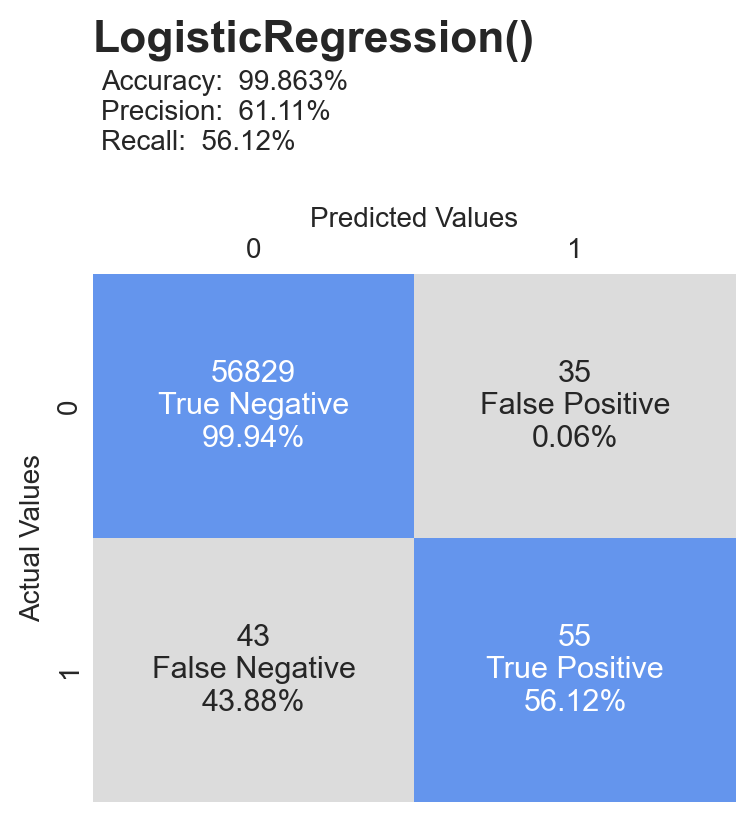

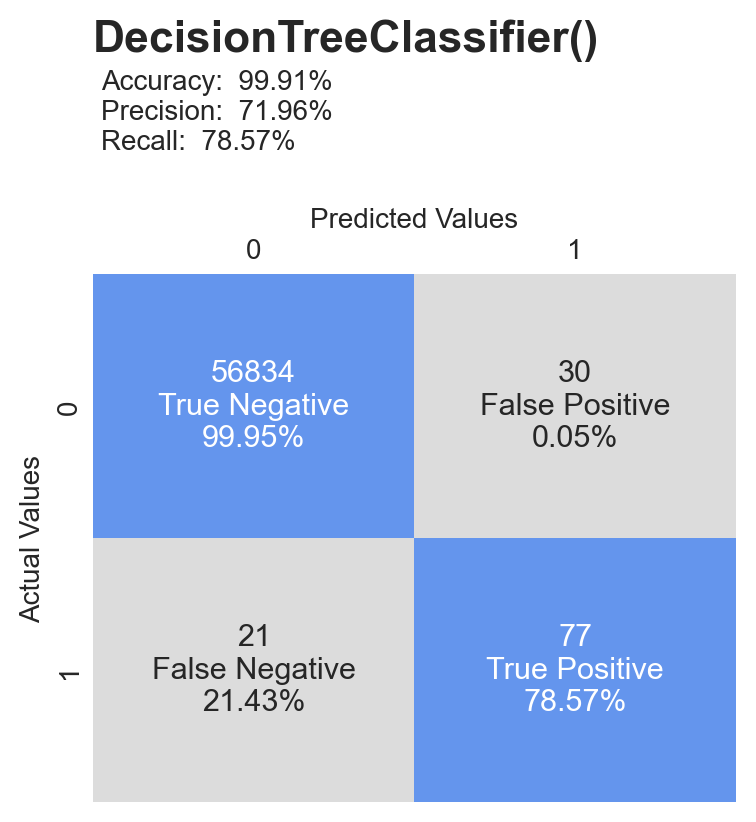

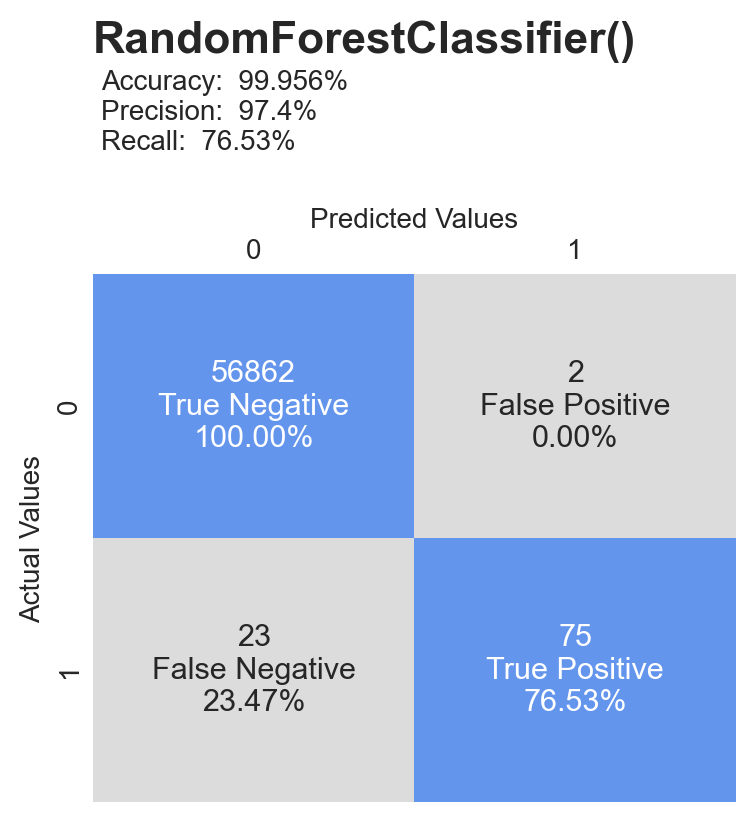

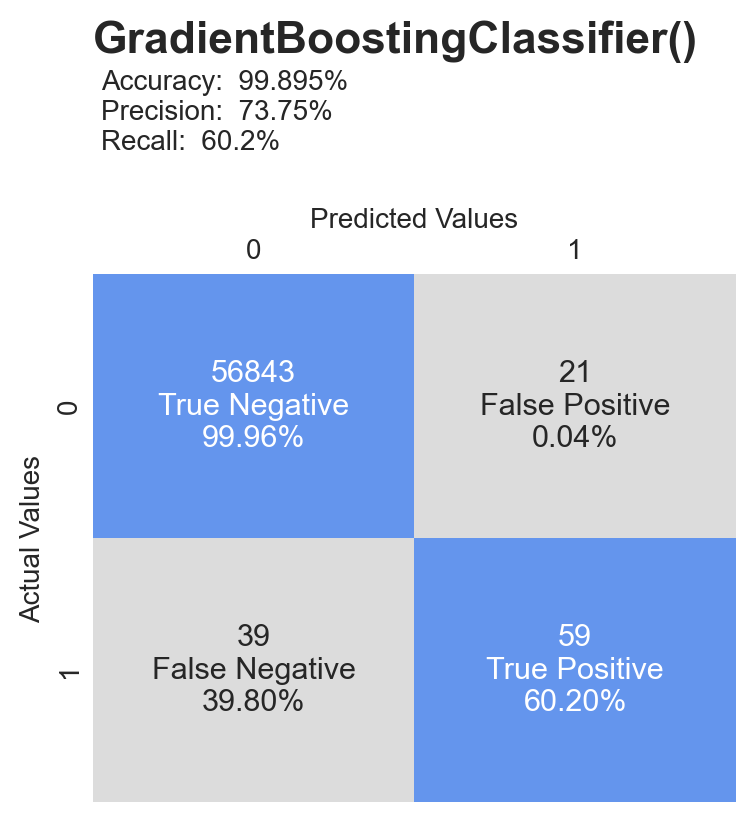

In [13]:
for model in models:
    report_scores_enhanced(model)

## Interpretation of Scores and Confusion Matrices

The business objective for this project is to correctly identify fraudluent credit card transactions, so that they be correctly flagged accordingly and prevented from processing. In order to make sure as many true positive fraud charges are detected we will evaluate the models using recall. After reviewing the models the best model for this purpose is the the random forest. All of the models had over 99% accuracy.

### Linear Regression

The linear regression model had the highest amount of false negatives. This is not good for our business objective because that means 44% of true positive fraud charges went undetected.

### Decision Tree

The decision tree model is the second best model for our business objective as it has almost the same recall as the random forest model but not as good of precision. 

### Random Forest

The random forest model had the highest accuracy, precision, and recall of the models. This seems to be the best model overall for our business objective.

### Gradient Boosting

The gradient boosting model had the second lowest recall, so not a good match for our business objective.